Processing:   0%|          | 0/4 [00:00<?, ?it/s]

训练参数：网络：SeEANet, 簇:6, 间隔时间: 17, 数据融合算法: PCA, 窗口大小：160
semg 数据形状为： torch.Size([138172, 6, 160])
angle 数据形状为： torch.Size([138172, 3])
开始第1次训练！！！
Epoch 100, train_idnex=1, Train Loss: 442.28292, Test Loss: 336.43633
Epoch 200, train_idnex=1, Train Loss: 69.51258, Test Loss: 76.60287
Epoch 300, train_idnex=1, Train Loss: 35.64520, Test Loss: 46.37927
Epoch 400, train_idnex=1, Train Loss: 16.40911, Test Loss: 25.19702
Epoch 500, train_idnex=1, Train Loss: 11.21606, Test Loss: 19.43380
Epoch 600, train_idnex=1, Train Loss: 9.03240, Test Loss: 16.87201
Epoch 700, train_idnex=1, Train Loss: 8.04722, Test Loss: 15.57881
Epoch 800, train_idnex=1, Train Loss: 7.57638, Test Loss: 14.98180
Epoch 900, train_idnex=1, Train Loss: 7.32253, Test Loss: 14.75597
Epoch 1000, train_idnex=1, Train Loss: 7.19969, Test Loss: 14.62954
Epoch 1100, train_idnex=1, Train Loss: 7.13573, Test Loss: 14.55480
Epoch 1200, train_idnex=1, Train Loss: 7.09969, Test Loss: 14.51893
Epoch 1300, train_idnex=1, Train Loss: 7.08

Processing:  25%|██▌       | 1/4 [7:26:54<22:20:42, 26814.05s/it]

metrics.json 文件已保存到: /home/admin123/SATData/Run/SeEANet/04-22-22:33:56/MJ_PCA_17_160/metrics.json
训练参数：网络：SeEANet, 簇:6, 间隔时间: 17, 数据融合算法: PCA, 窗口大小：192
semg 数据形状为： torch.Size([136572, 6, 192])
angle 数据形状为： torch.Size([136572, 3])
开始第1次训练！！！
Epoch 100, train_idnex=1, Train Loss: 313.27766, Test Loss: 409.78985
Epoch 200, train_idnex=1, Train Loss: 112.16568, Test Loss: 94.77675
Epoch 300, train_idnex=1, Train Loss: 33.88743, Test Loss: 39.47530
Epoch 400, train_idnex=1, Train Loss: 18.50087, Test Loss: 25.59884
Epoch 500, train_idnex=1, Train Loss: 11.13196, Test Loss: 18.68611
Epoch 600, train_idnex=1, Train Loss: 8.86734, Test Loss: 16.12818
Epoch 700, train_idnex=1, Train Loss: 7.87330, Test Loss: 14.97060
Epoch 800, train_idnex=1, Train Loss: 7.38506, Test Loss: 14.47949
Epoch 900, train_idnex=1, Train Loss: 7.14144, Test Loss: 14.20686
Epoch 1000, train_idnex=1, Train Loss: 7.01472, Test Loss: 14.08526
Epoch 1100, train_idnex=1, Train Loss: 6.94880, Test Loss: 14.01778
Epoch 1200, 

Processing:  50%|█████     | 2/4 [14:53:30<14:53:27, 26803.73s/it]

metrics.json 文件已保存到: /home/admin123/SATData/Run/SeEANet/04-22-22:33:56/MJ_PCA_17_192/metrics.json
训练参数：网络：SeEANet, 簇:6, 间隔时间: 17, 数据融合算法: PCA, 窗口大小：224
semg 数据形状为： torch.Size([134972, 6, 224])
angle 数据形状为： torch.Size([134972, 3])
开始第1次训练！！！
Epoch 100, train_idnex=1, Train Loss: 894.15934, Test Loss: 388.21068
Epoch 200, train_idnex=1, Train Loss: 82.79382, Test Loss: 107.88057
Epoch 300, train_idnex=1, Train Loss: 41.75364, Test Loss: 49.88029
Epoch 400, train_idnex=1, Train Loss: 21.80970, Test Loss: 30.83631
Epoch 500, train_idnex=1, Train Loss: 14.28051, Test Loss: 22.16888
Epoch 600, train_idnex=1, Train Loss: 11.43339, Test Loss: 19.24982
Epoch 700, train_idnex=1, Train Loss: 10.17623, Test Loss: 17.72903
Epoch 800, train_idnex=1, Train Loss: 9.56826, Test Loss: 17.13080
Epoch 900, train_idnex=1, Train Loss: 9.24799, Test Loss: 16.82363
Epoch 1000, train_idnex=1, Train Loss: 9.09217, Test Loss: 16.64582
Epoch 1100, train_idnex=1, Train Loss: 9.01187, Test Loss: 16.53881
Epoch 1200

Processing:  75%|███████▌  | 3/4 [22:33:16<7:32:40, 27160.98s/it] 

metrics.json 文件已保存到: /home/admin123/SATData/Run/SeEANet/04-22-22:33:56/MJ_PCA_17_224/metrics.json
训练参数：网络：SeEANet, 簇:6, 间隔时间: 17, 数据融合算法: PCA, 窗口大小：256
semg 数据形状为： torch.Size([133372, 6, 256])
angle 数据形状为： torch.Size([133372, 3])
开始第1次训练！！！
Epoch 100, train_idnex=1, Train Loss: 373.43057, Test Loss: 544.87845
Epoch 200, train_idnex=1, Train Loss: 71.76276, Test Loss: 95.69210
Epoch 300, train_idnex=1, Train Loss: 25.37946, Test Loss: 37.87218
Epoch 400, train_idnex=1, Train Loss: 13.18439, Test Loss: 20.74368
Epoch 500, train_idnex=1, Train Loss: 7.85309, Test Loss: 13.79146
Epoch 600, train_idnex=1, Train Loss: 6.25946, Test Loss: 11.86091
Epoch 700, train_idnex=1, Train Loss: 5.51860, Test Loss: 11.06478
Epoch 800, train_idnex=1, Train Loss: 5.17259, Test Loss: 10.59502
Epoch 900, train_idnex=1, Train Loss: 4.99617, Test Loss: 10.44655
Epoch 1000, train_idnex=1, Train Loss: 4.90390, Test Loss: 10.35000
Epoch 1100, train_idnex=1, Train Loss: 4.85640, Test Loss: 10.30522
Epoch 1200, tr

Processing: 100%|██████████| 4/4 [29:56:52<00:00, 26953.10s/it]  

metrics.json 文件已保存到: /home/admin123/SATData/Run/SeEANet/04-22-22:33:56/MJ_PCA_17_256/metrics.json
字典已成功保存到 /home/admin123/SATData/Run/04-22-22:33:56/data.json


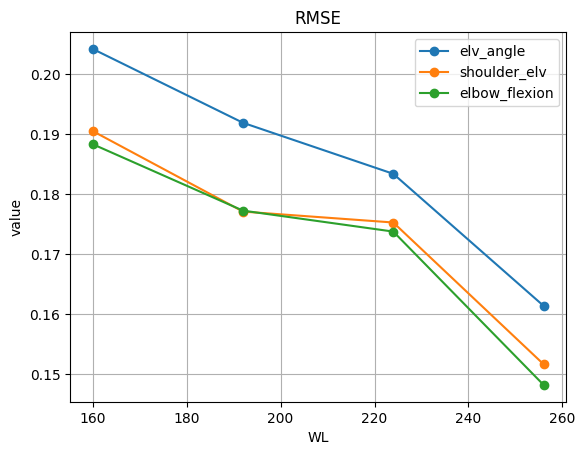

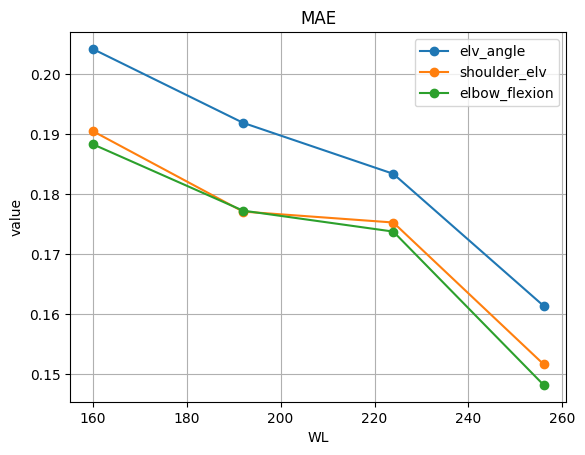

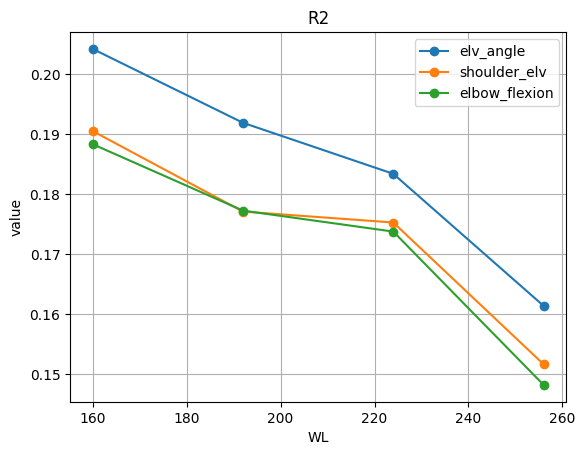

In [ ]:
# 验证 delta_T
from utils.train_func import train_func
from datetime import datetime
from tqdm import tqdm
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from utils.tools import make_dir, plot_func


modelList = ['SeEANet', 'SAT', 'MyoNet']
data_dict = {}
# delta_Tlist = [1, 10, 15, 20, 25, 30, 40, 50, 60]
# delta_Tlist = [1, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90 ,100, 120, 140, 160, 180, 200, 230, 260, 300]
# delta_Tlist = [260, 300]

# # people_List = ['S01', 'S02', "S03"]
# people_List = ['S01']

# delta_Tlist = [i for i in range(21, 31)]
people_List = ['S01', 'S02', "S03", "S04", "S05"]
# people_List = ['S01']

delta_T  = 17
# WLlist = [32, 64, 96, 128]
WindowLength = 256

saveDir = "/home/admin123/SATData/Run"
dataDir = "/home/admin123/SATData/data"
CNList = [6, 8]
rmseL = []
maeL = []
r2L = []
formatted_time = datetime.now().strftime("%m-%d-%H:%M:%S")
make_dir(os.path.join(saveDir, formatted_time))
for cluster_name in tqdm(CNList, desc="Processing", position=0):
    rmse, mae, r2 = train_func(modelName='SeEANet', epochs=1500, train_num=10, delta_T=delta_T, windowLength=WindowLength, cluster_num=cluster_name,
                               formatted_time = formatted_time, peopleList=people_List, batch_size=256,
                               data_Dir=dataDir, save_Dir=saveDir)
    rmse = np.array(rmse)
    rmse_m = np.mean(rmse,axis=0)
    rmse_s = np.std(rmse, axis=0)
    rmse_d = np.max(rmse, axis=0)-np.min(rmse, axis=0)
    rmseL.append(rmse_m)

    mae = np.array(mae)
    mae_m = np.mean(mae,axis=0)
    mae_s = np.std(mae, axis=0)
    mae_d = np.max(mae, axis=0)-np.min(mae, axis=0)
    maeL.append(mae_m)

    r2 = np.array(r2)
    r2_m = np.mean(r2,axis=0)
    r2_s = np.std(r2, axis=0)
    r2_d = np.max(r2, axis=0)-np.min(r2, axis=0)
    r2L.append(r2_m)

    data_dict[f"rmse_{delta_T}"] = [list(rmse_m), list(rmse_s), list(rmse_d)]
    data_dict[f"mae_{delta_T}"] = [list(mae_m), list(mae_s), list(mae_d)]
    data_dict[f"r2_{delta_T}"] = [list(r2_m), list(r2_s), list(r2_d)]

# 指定 JSON 文件路径
file_path = os.path.join(saveDir, formatted_time, "data.json")

with open(file_path, "w", encoding="utf-8") as file:
    json.dump(data_dict, file, ensure_ascii=False, indent=4)

print(f"字典已成功保存到 {file_path}")


rmseL = np.array(rmseL)
maeL = np.array(maeL)
r2L = np.array(r2L)

List = CNList
Xlabel = "Cluster Num"

saveFolderName = "CN——指标对比"
save_Dir = os.path.join('/home/admin123/SATData/Run', "figures", saveFolderName)
plot_func(save_Dir, rmseL, List, Xlabel, "value", 0, None, "RMSE.png")
plot_func(save_Dir, maeL, List, Xlabel, "value", 0, None, "MAE.png")
plot_func(save_Dir, r2L, List, Xlabel, "value", 0, None, "R2.png")

